In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [185]:
def break_xaxis(ax, ax2, xlim_ax1, xlim_ax2):
    ax.set_xlim(*xlim_ax1)
    ax2.set_xlim(*xlim_ax2)

    # hide the spines between ax and ax2
    ax.spines.right.set_visible(False)
    ax2.spines.left.set_visible(False)
    ax.yaxis.tick_left()
    ax2.yaxis.tick_right()

    # Draw the diagonal lines
    d = 0.7  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([1, 1], [1, 0], transform=ax.transAxes, **kwargs)
    ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

    # we can vary the distance between
    # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
    # the diagonal lines will move accordingly, and stay right at the tips
    # of the spines they are 'breaking'

In [95]:
def plot_dropped_reads(df):
    # Plot dropped reads
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', 
                                   figsize=[12, 7], 
                                   gridspec_kw={'width_ratios': [0.98, 0.02]})

    for program in df["program"].unique():

        # Only take data for one program 
        df_program = df[df["program"] == program]

        for ax in (ax1, ax2):
            ax.plot(df_program["fraglen"], 
                    df_program["dropped_reads_percentage"],
                    #marker=".", 
                    linewidth=1, 
                    label=program)

    break_xaxis(ax1, ax2, 0, 251, 998, 1001)
    fig.subplots_adjust(wspace=0.05)
    ax2.set_xticks([1000])
    
    ax1.set_xticks(range(0,251,10))
    ax1.set_yticks(range(0,101,10))
    
    ax1.set_xlabel('Fragment lengths')
    ax1.set_ylabel('Dropped reads (%)')
    
    ax1.grid(alpha=0.5)
    ax2.grid(alpha=0.5)
    
    ax1.set_title("Percentage of dropped reads")
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [336]:
def plot_read_lengths(program, frag_len, dropped, incorrect_len, 
                      correct_len_incorrect_seq, perfect):
      
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', 
                                   figsize=[10, 7], 
                                   gridspec_kw={'width_ratios': [0.98, 0.02]})
    
    for ax in (ax1, ax2):
        width = 1
        ax.bar(frag_len, dropped, width, label='not merged', color='#57106e')
        bottom = copy.deepcopy(dropped)
        ax.bar(frag_len, incorrect_len, width, bottom=bottom, 
               label='incorrect length', color='#bc3754')
        bottom += incorrect_len
        ax.bar(frag_len, correct_len_incorrect_seq, width, bottom=bottom, 
              label='correct len, incorrect seq', color='#f98e09')
        bottom += correct_len_incorrect_seq
        ax.bar(frag_len, perfect, width, bottom=bottom, 
              label='perfectly reconstructed', color='#fcffa4')
        bottom += perfect

    # break axis
    fig.subplots_adjust(wspace=0.03)
    break_xaxis(ax1, ax2, (0, 253), (997, 1001))
    # Set y axis limit
    ax1.set_ylim(0, max(bottom))
    # Add ticks
    ax2.set_xticks([1000])
    ax1.set_xticks(range(0,251,10))
    ax1.set_yticks(range(0,101,10))
    # Add a line at the read length
    ax1.plot([125.5, 125.5], [0, 100], color='green', linestyle='--', lw=1)
    ax1.text(124, 80, f"raw read length", color='green', fontsize=7,
             rotation=90, rotation_mode='anchor')
    # Add grid
    ax1.grid(alpha=0.5)
    ax2.grid(alpha=0.5)
    # Add labels, title
    ax1.set_xlabel('Fragment lengths')
    ax1.set_ylabel('Percentage')
    ax1.set_title(f"{program}, merged reads")
    # Add legend and change order
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [3, 2, 1, 0]
    ax2.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
               loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

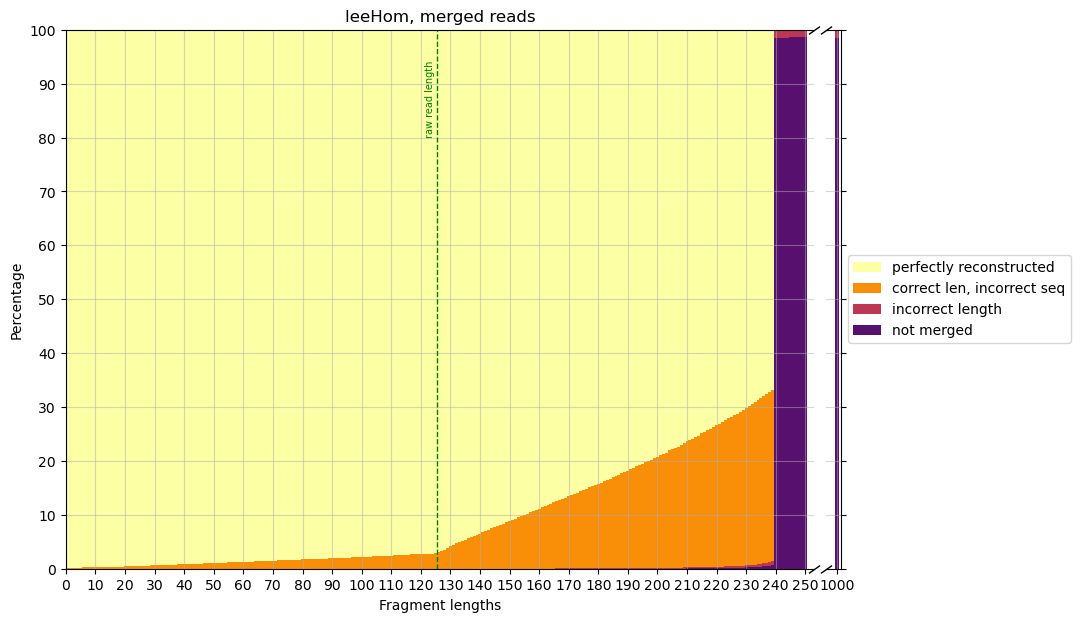

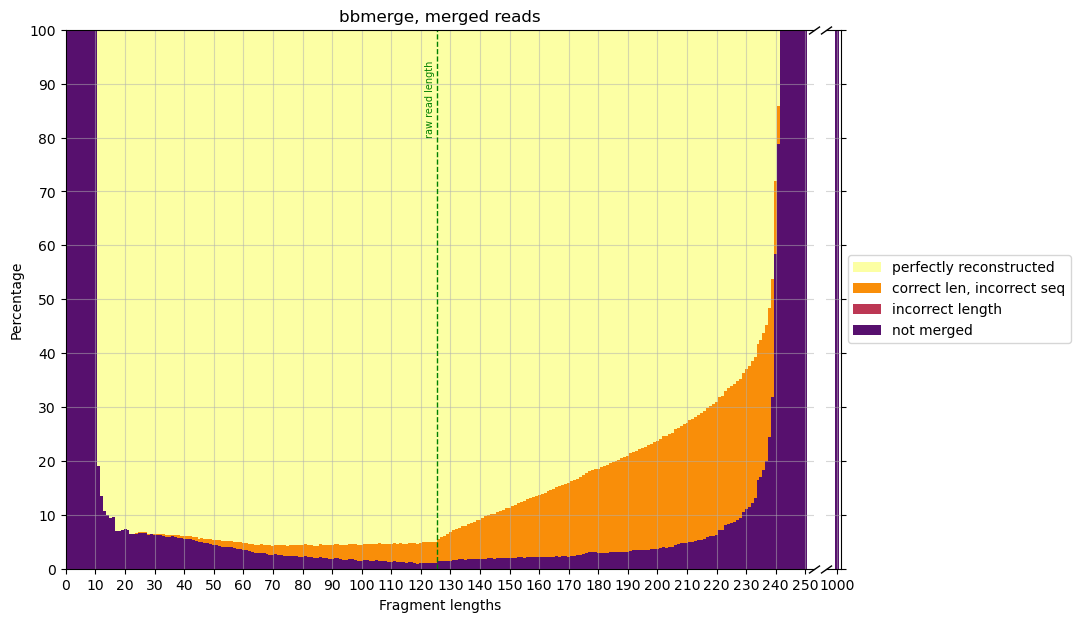

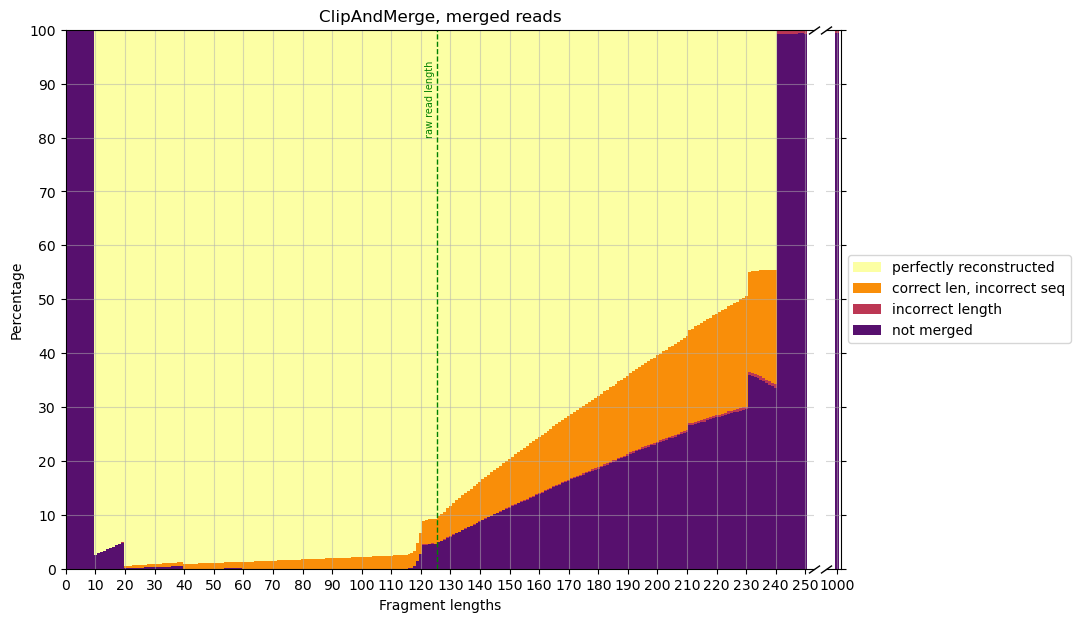

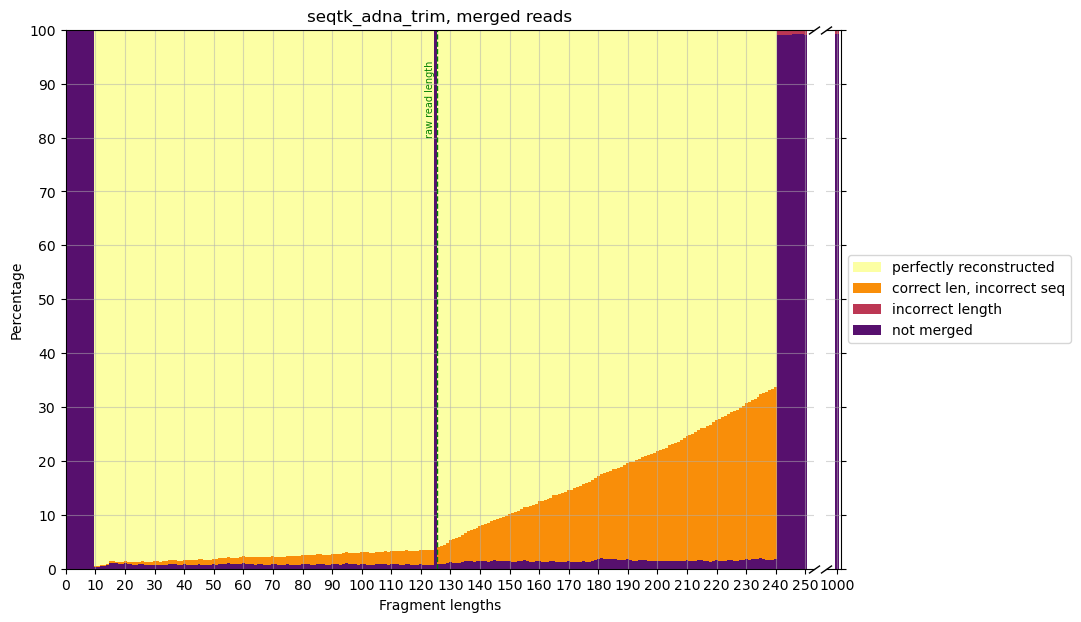

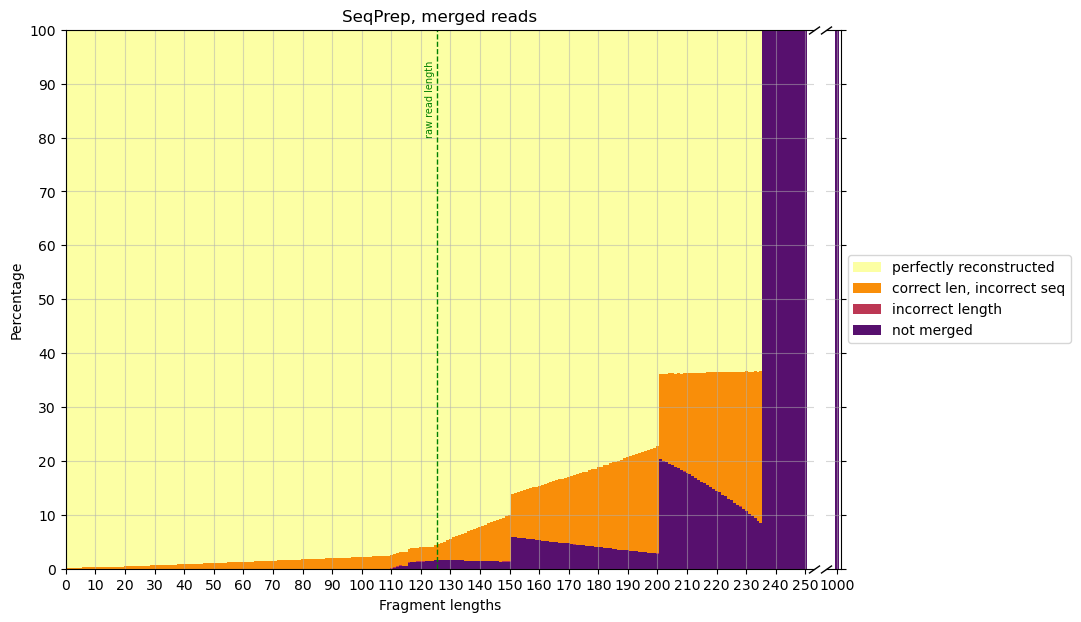

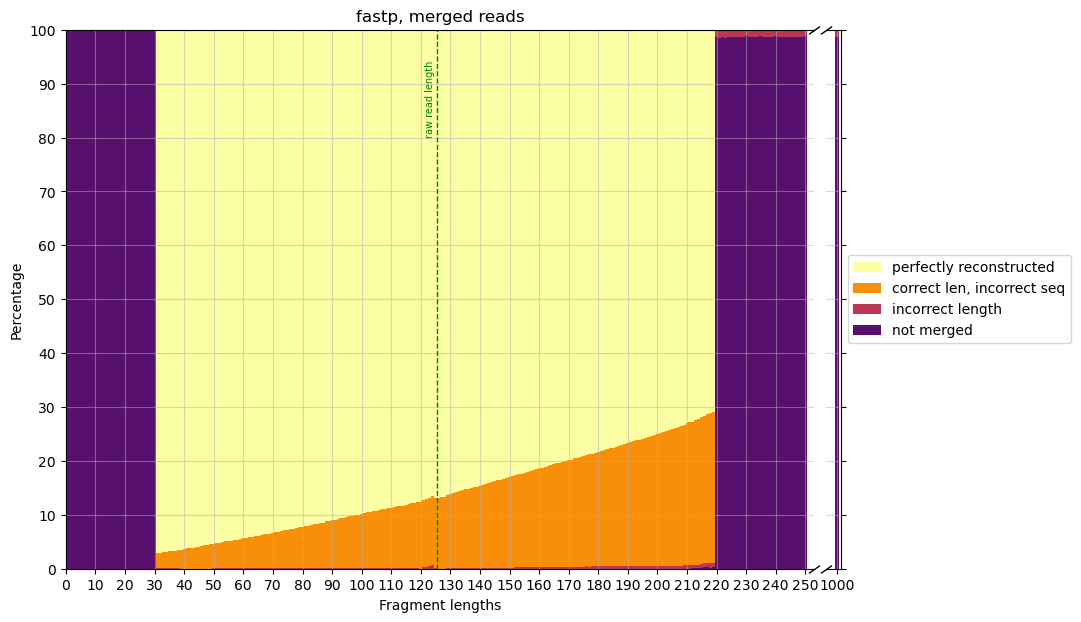

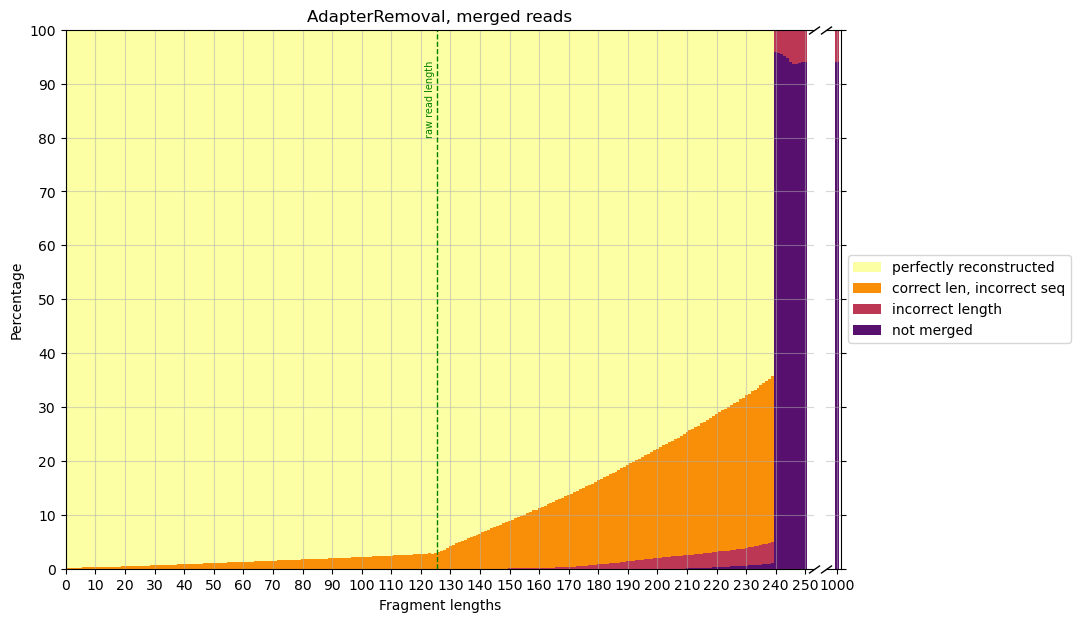

In [337]:
infile = "/mnt/c/Users/s202633/Documents/Master thesis/DNA_reconstruct/fragment_lengths/output/evaluation/all_merged_leonardo.csv"
df = pd.read_csv(infile)
df = df.sort_values(by=['fraglen'])
for program in list(df["program"].unique()):
    
    # Only take data for one program 
    df_program = df[df["program"] == program]
    
    frag_len = df_program["fraglen"]
    dropped = df_program["dropped_reads_percentage"]
    incorrect_len = df_program["incorrect_length_percentage"]
    #correct_len_incorrect_seq = df_program["correct_len_incorrect_seq_percentage"]
    correct_len_incorrect_seq = (df_program["divergent_reads"] - df_program["incorrect_length_reads"]) / df_program["nfrags"] * 100
    perfect = df_program["perfectly_reconstructed_percentage"]
    
    plot_read_lengths(program, frag_len, dropped, incorrect_len, 
                      correct_len_incorrect_seq, perfect)
 

In [153]:
df_program.tail()

,program,filename,nfrags,fraglen,total_sequences,total_reads,dropped_reads,incorrect_length_reads,divergent_reads,average_divergence,dropped_reads_percentage,incorrect_length_percentage,divergent_reads_percentage,average_divergence_percentage,perfectly_reconstructed,perfectly_reconstructed_percentage
1418,leeHom,gen_n1000000_l247_leehom.fq.gz,1000000,247,1000000,14075,985925,14075,14075,41.707709,101.407,1.407,100.0,16.886,0,0.0
1419,leeHom,gen_n1000000_l248_leehom.fq.gz,1000000,248,1000000,14359,985641,14359,14359,43.216310,101.436,1.436,100.0,17.426,0,0.0
1420,leeHom,gen_n1000000_l249_leehom.fq.gz,1000000,249,1000000,14322,985678,14322,14322,44.176232,101.432,1.432,100.0,17.741,0,0.0
1422,leeHom,gen_n1000000_l250_leehom.fq.gz,1000000,250,1000000,13921,986079,13921,13921,49.630199,101.392,1.392,100.0,19.852,0,0.0
1255,leeHom,gen_n1000000_l1000_leehom.fq.gz,1000000,1000,1000000,14521,985479,14521,14521,811.284553,101.452,1.452,100.0,81.128,0,0.0


In [105]:
(df_program["divergent_reads"] - df_program["incorrect_length_reads"]) / df_program["nfrags"]

362    0.000464
424    0.000870
435    0.001315
446    0.001852
457    0.002154
         ...   
414    0.000000
415    0.000000
416    0.000000
418    0.000000
251    0.000000
Length: 251, dtype: float64

In [97]:
for program in list(df["program"].unique()):

    # Only take data for one program 
    df_program = df[df["program"] == program]
    for x in df_program.index:
        fraglen = df_program["fraglen"][x]
        dropped_reads = df_program["dropped_reads_percentage"][x]
        divergent_reads = df_program["divergent_reads_percentage"][x]
        perfect_reads = df_program["perfectly_reconstructed_percentage"][x]


# Plot divergences

In [344]:
infile = "/mnt/c/Users/s202633/Documents/Master thesis/DNA_reconstruct/fragment_lengths/output/evaluation/all_merged_test.csv"
df = pd.read_csv(infile)
df = df.sort_values(by=['fraglen'])

In [345]:
df.head()

,program,filename,nfrags,fraglen,total_sequences,total_reads,dropped_reads,avg_divergence_per_nt,edit_distances
34,seqtk_adna_trim,gen_n100_l50_merged.fq,100,50,100,100,0,0.02,0:99 1:1
29,SeqPrep,gen_n100_l50_merged.fq.gz,100,50,100,100,0,0.02,0:99 1:1
4,AdapterRemoval,gen_n100_l50_merged.fq,100,50,100,100,0,0.02,0:99 1:1
24,leeHom,gen_n100_l50_merged.fq.gz,100,50,100,100,0,0.02,0:99 1:1
19,fastp,gen_n100_l50_merged.fq,100,50,100,100,0,0.08,0:97 1:2 2:1


ValueError: shape mismatch: objects cannot be broadcast to a single shape

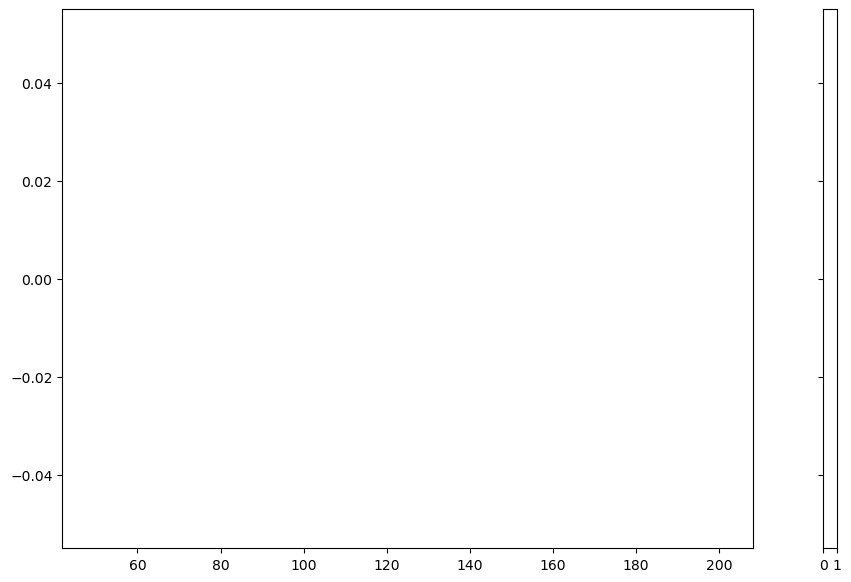

In [354]:
def get_edit_distance_matrix(df_program, num_categories):
    # convert the edit_distance strings to a matrix for bar plotting
    nfrags = list(df_program["nfrags"])[0]
    edit_distance_matrix = []
    for row in df_program["edit_distances"]:
        # create the row of the matrx
        occurences_per_edit_distance = num_categories * [0]
        for element in row.split():
            edit_dist, cnt = [int(x) for x in element.split(":")]
            percent = round(cnt/nfrags*100, 3)
            # edit distances bigger than the matrix will be put into the last row
            if edit_dist >= num_categories:
                occurences_per_edit_distance[-1] += percent
            else:
                occurences_per_edit_distance[int(edit_dist)] = percent
        edit_distance_matrix.append(occurences_per_edit_distance)
    return list(enumerate(zip(*edit_distance_matrix)))

for program in list(df["program"].unique()):
    
    # Only take data for one program 
    df_program = df[df["program"] == program]
    
    nfrags = df_program["nfrags"]
    frag_len = df_program["fraglen"]
    dropped_percent = df_program["dropped_reads"] / nfrags * 100
    edit_distances = get_edit_distance_matrix(df_program, num_categories=7)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', 
                                   figsize=[10, 7], 
                                   gridspec_kw={'width_ratios': [0.98, 0.02]})
    labels = [
        "prefectly reconstructed", 
        "edit distance = 1",
        "edit distance = 2",
        "edit distance = 3",
        "edit distance = 4",
        "edit distance = 5",
        "edit distance = >6",
        ]
    colors = [
        "#fcffa4",
        "#fac228",
        "#f57d15",
        "#d44842",
        "#9f2a63",
        "#65156e",
        "#280b53",
        ]
    width = 1
    
    for ax in (ax1, ax2):
        bottom = len(df_program) * [0]
        # Plot divergent and perfectly reconstructed reads
        for i, percent in list(reversed(edit_distances)):
            print(bottom)
            ax.bar(frag_len, percent, width, bottom=bottom, label=labels[i], color=colors[i])
            bottom += [sum(x) for x in zip(bottom, percent)]
        # Plot unmerge reads
        ax.bar(frag_len, dropped_percent, width, bottom=bottom,
               label='not merged', color='tab:grey')
        bottom += [sum(x) for x in zip(bottom, dropped_percent)]

    # break axis
    fig.subplots_adjust(wspace=0.03)
    break_xaxis(ax1, ax2, (0, 253), (997, 1001))
    # Set y axis limit
    ax1.set_ylim(0, max(bottom))
    # Add ticks
    ax2.set_xticks([1000])
    ax1.set_xticks(range(0,251,10))
    ax1.set_yticks(range(0,101,10))
    # Add a line at the read length
    ax1.plot([125.5, 125.5], [0, 100], color='green', linestyle='--', lw=1)
    ax1.text(124, 80, f"raw read length", color='green', fontsize=7,
             rotation=90, rotation_mode='anchor')
    # Add grid
    ax1.grid(alpha=0.5)
    ax2.grid(alpha=0.5)
    # Add labels, title
    ax1.set_xlabel('Fragment lengths')
    ax1.set_ylabel('Percentage')
    ax1.set_title(f"{program}, merged reads")
    # Add legend and change order
    handles, labels = plt.gca().get_legend_handles_labels()
    order = list(reversed(range(len(edit_distances)+1)))
    ax2.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
               loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    # fig.tight_layout()
    # plt.savefig(f"{outdir}/{program}.png", 
    #             dpi='figure', 
    #             format="png")
    break

In [356]:
df_program

,program,filename,nfrags,fraglen,total_sequences,total_reads,dropped_reads,avg_divergence_per_nt,edit_distances
34,seqtk_adna_trim,gen_n100_l50_merged.fq,100,50,100,100,0,0.020,0:99 1:1
30,seqtk_adna_trim,gen_n100_l120_merged.fq,100,120,100,97,3,0.034,0:93 1:4
31,seqtk_adna_trim,gen_n100_l125_merged.fq,100,125,100,1,99,0.000,0:1
32,seqtk_adna_trim,gen_n100_l130_merged.fq,100,130,100,100,0,0.046,0:94 1:6
33,seqtk_adna_trim,gen_n100_l200_merged.fq,100,200,100,99,1,0.126,0:78 1:17 2:4


In [355]:
frag_len, percent, width, bottom, labels[i], colors[i]

(34     50
 30    120
 31    125
 32    130
 33    200
 Name: fraglen, dtype: int64,
 (0, 0, 0, 0, 0),
 1,
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'edit distance = 5',
 '#65156e')

In [360]:
[x for x in zip(bottom, percent)]

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]

In [358]:
bottom

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [349]:
bottom = len(df_program) * [0]
bottom

[0, 0, 0, 0, 0]

In [350]:
percent

(99.0, 93.0, 1.0, 94.0, 78.0)

In [352]:
[sum(x) for x in zip(bottom, percent)]

[99.0, 93.0, 1.0, 94.0, 78.0]